# Sobreviência a falhas cardíacas
### Feito por Carolina Hirschheimer e Ralph Michaan

O estudo a seguir visa prever, após certo tempo, a chance de a <b> sobrevivência </b> de um paciente após ter sofrido uma <b> falha caríaca</b>. Para tanto, será utilizada uma base de dados contendo a idade do paciente, se ele tem anemia, a sua taxa de fosfocreatinina, a taxa de ejeção de sangue pelo coração, se ele tem pressão alta, a concentração de soro sódio, o seu sexo, se ele fuma, o período de tempo que já passou desde a falha cardíaca e, finalmente, a ocorrência ou não de morte. 

## Análise exploratória dos dados

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dados = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
dados["anaemia"] = dados.anaemia.astype('category')
dados.anaemia.cat.categories = ["no", "yes"]

dados["diabetes"] = dados.diabetes.astype('category')
dados.diabetes.cat.categories = ["no", "yes"]

dados["high_blood_pressure"] = dados.high_blood_pressure.astype('category')
dados.high_blood_pressure.cat.categories = ["no", "yes"]

dados["smoking"] = dados.smoking.astype('category')
dados.smoking.cat.categories = ["no", "yes"]

dados["DEATH_EVENT"] = dados.DEATH_EVENT.astype('category')
dados.DEATH_EVENT.cat.categories = ["no", "yes"]

dados["sex"] = dados.sex.astype('category')
dados.sex.cat.categories = ["women", "man"]

In [4]:
dados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,no,582,no,20,yes,265000.00,1.9,130,man,no,4,yes
1,55.0,no,7861,no,38,no,263358.03,1.1,136,man,no,6,yes
2,65.0,no,146,no,20,no,162000.00,1.3,129,man,yes,7,yes
3,50.0,yes,111,no,20,no,210000.00,1.9,137,man,no,7,yes
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,women,no,8,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,no,61,yes,38,yes,155000.00,1.1,143,man,yes,270,no
295,55.0,no,1820,no,38,no,270000.00,1.2,139,women,no,271,no
296,45.0,no,2060,yes,60,no,742000.00,0.8,138,women,no,278,no
297,45.0,no,2413,no,38,no,140000.00,1.4,140,man,yes,280,no


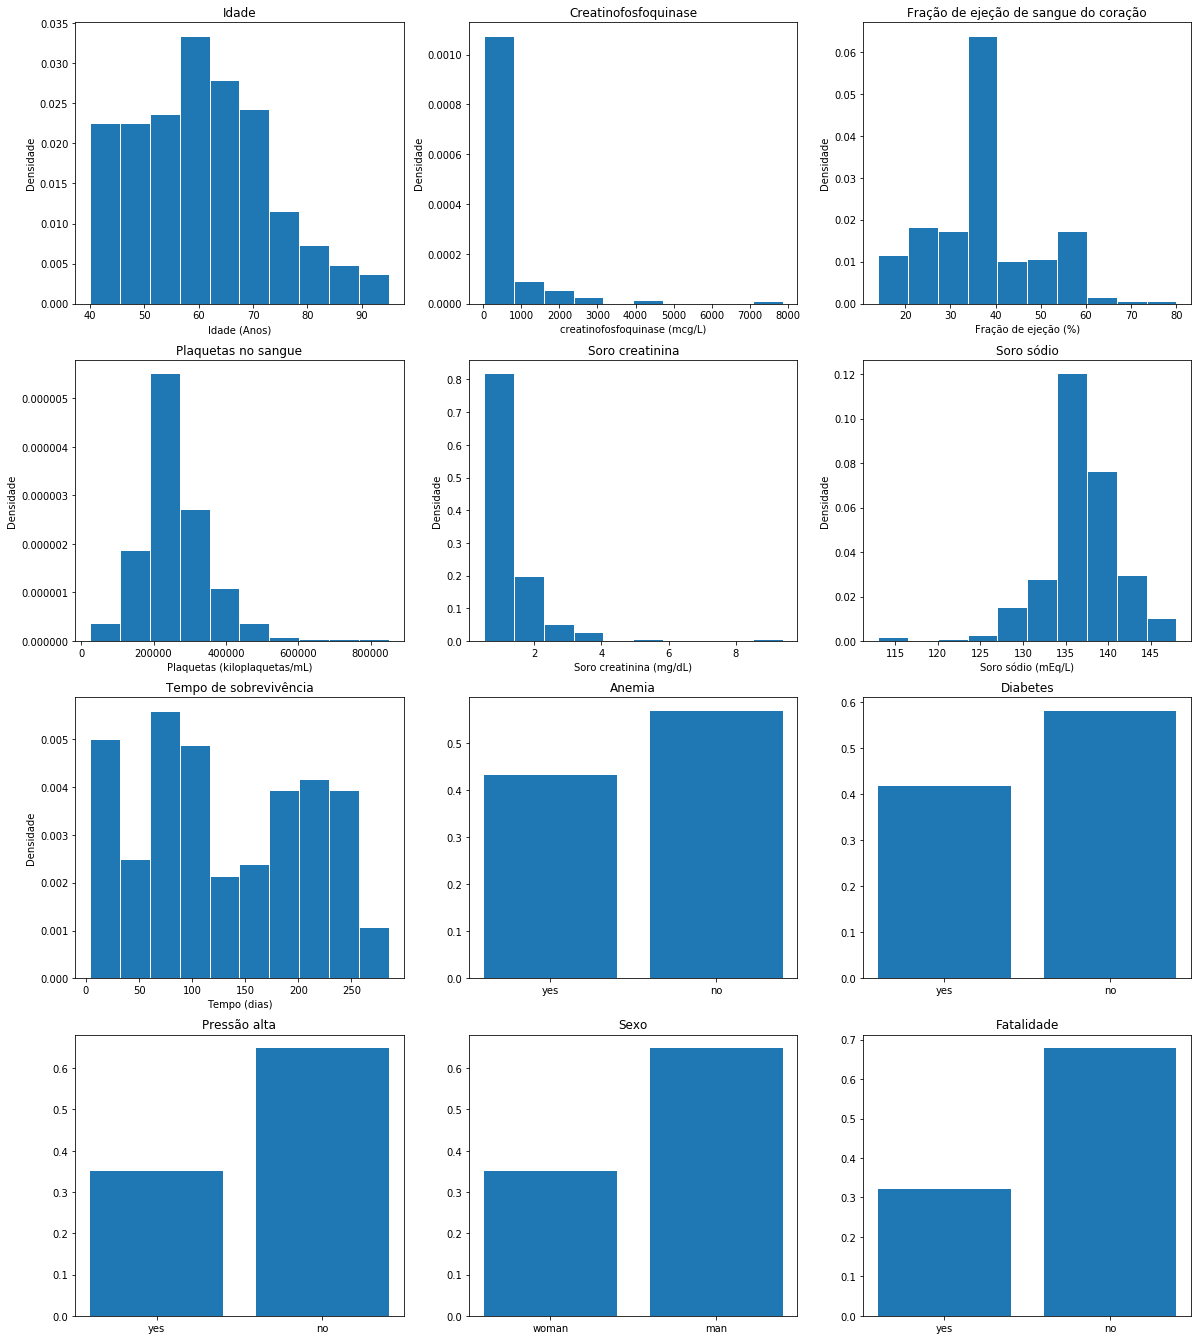

In [5]:
# FREQUÊNCIA DAS VARIÁVEIS QUANTITATIVAS

plt.figure(figsize=(20, 30))

plt.subplot(531)
plt.hist(dados.age, edgecolor='white', density=True)
plt.title('Idade')
plt.xlabel('Idade (Anos)')
plt.ylabel('Densidade')

plt.subplot(532)
plt.hist(dados.creatinine_phosphokinase, edgecolor='white', density=True)
plt.title('Creatinofosfoquinase')
plt.xlabel('creatinofosfoquinase (mcg/L)')
plt.ylabel('Densidade')

plt.subplot(533)
plt.hist(dados.ejection_fraction, edgecolor='white', density=True)
plt.title('Fração de ejeção de sangue do coração')
plt.xlabel('Fração de ejeção (%)')
plt.ylabel('Densidade')

plt.subplot(534)
plt.hist(dados.platelets, edgecolor='white', density=True)
plt.title('Plaquetas no sangue')
plt.xlabel('Plaquetas (kiloplaquetas/mL)')
plt.ylabel('Densidade')

plt.subplot(535)
plt.hist(dados.serum_creatinine, edgecolor='white', density=True)
plt.title('Soro creatinina')
plt.xlabel('Soro creatinina (mg/dL)')
plt.ylabel('Densidade')

plt.subplot(536)
plt.hist(dados.serum_sodium, edgecolor='white', density=True)
plt.title('Soro sódio')
plt.xlabel('Soro sódio (mEq/L)')
plt.ylabel('Densidade')

plt.subplot(537)
plt.hist(dados.time, edgecolor='white', density=True)
plt.title('Tempo de sobrevivência')
plt.xlabel('Tempo (dias)')
plt.ylabel('Densidade')

# FREQUÊNCIA DAS VARIÁVEIS QUALITATIVAS

def frequencia_variaveis_quali(serie_quali,categoria_1,categoria_2):
    total_1 = len(dados.loc[serie_quali==categoria_1,:])
    total_2 = len(dados.loc[serie_quali==categoria_2,:])
    total = len(dados)
    
    freq_1 = total_1/total
    freq_2 = total_2/total
    
    y = [freq_1,freq_2]
    return y

plt.subplot(538)
plt.bar(['yes','no'],frequencia_variaveis_quali(dados.anaemia,'yes','no'))
plt.title('Anemia')

plt.subplot(5,3,9)
plt.bar(['yes','no'],frequencia_variaveis_quali(dados.diabetes,'yes','no'))
plt.title('Diabetes')

plt.subplot(5,3,10)
plt.bar(['yes','no'],frequencia_variaveis_quali(dados.high_blood_pressure,'yes','no'))
plt.title('Pressão alta')

plt.subplot(5,3,11)
plt.bar(['woman','man'],frequencia_variaveis_quali(dados.sex,'women','man'))
plt.title('Sexo')

plt.subplot(5,3,12)
plt.bar(['yes','no'],frequencia_variaveis_quali(dados.DEATH_EVENT,'yes','no'))
plt.title('Fatalidade')

plt.show()

In [6]:
dados.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [7]:
dados.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

In [8]:
dados.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

In [9]:
dados.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [10]:
dados.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [11]:
dados.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

In [12]:
dados.time.describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

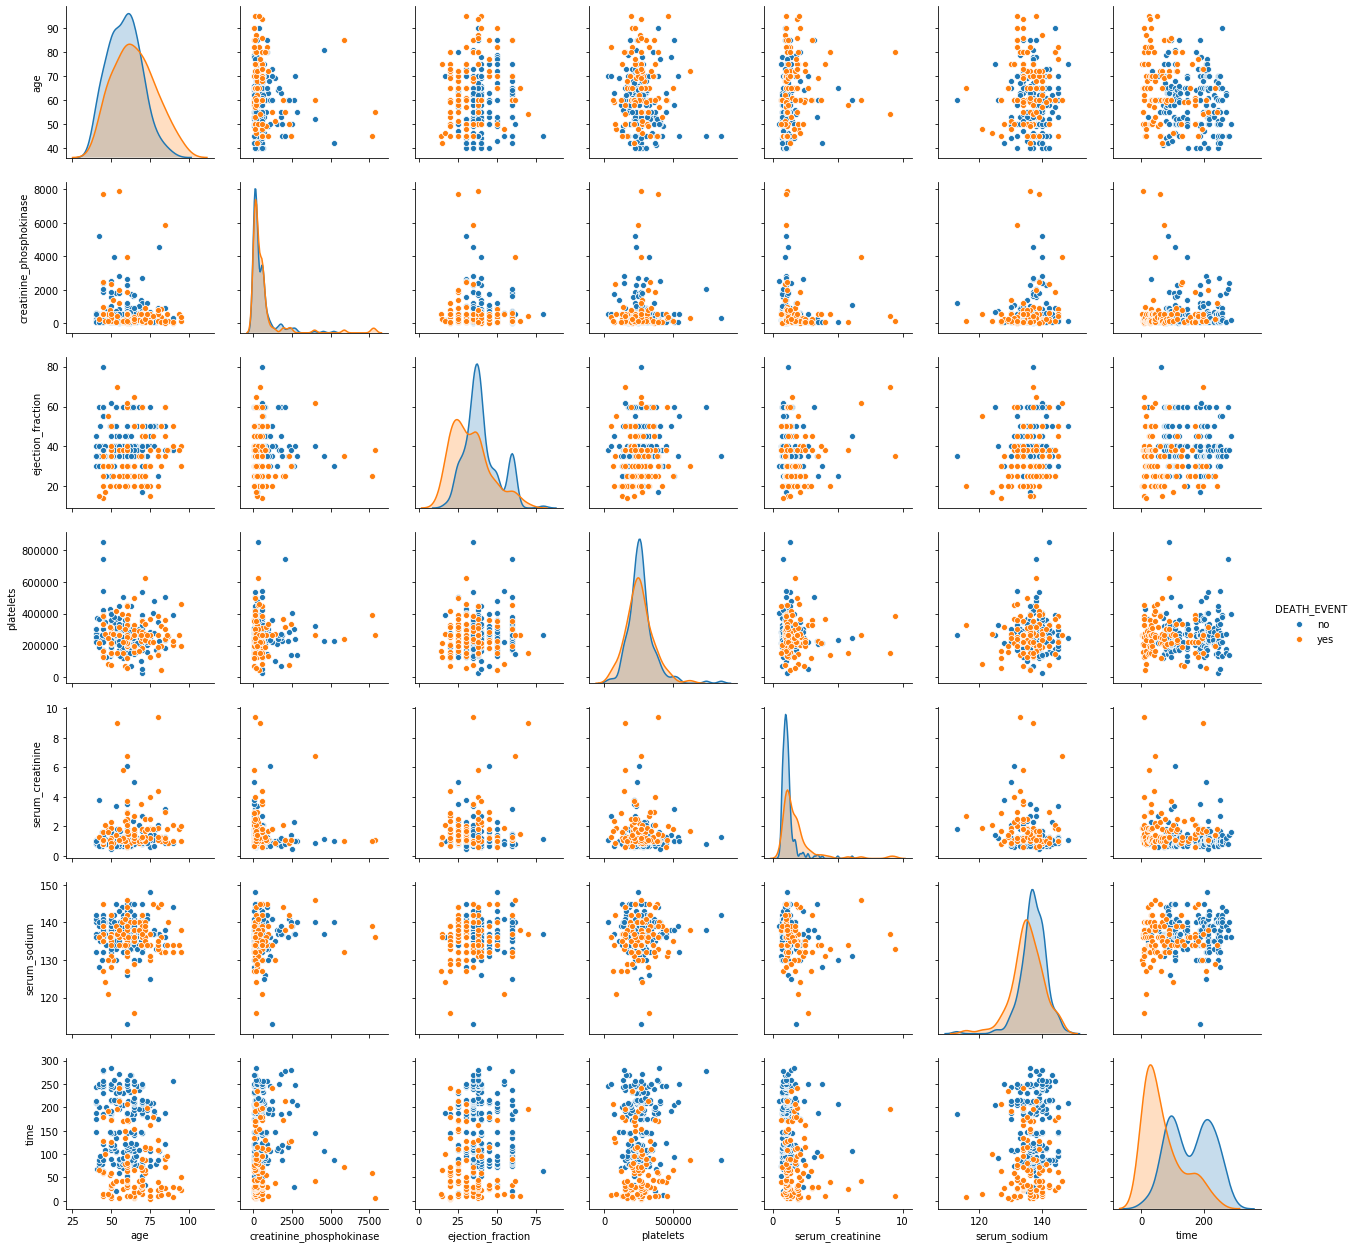

In [13]:
sns.pairplot(dados, hue="DEATH_EVENT")

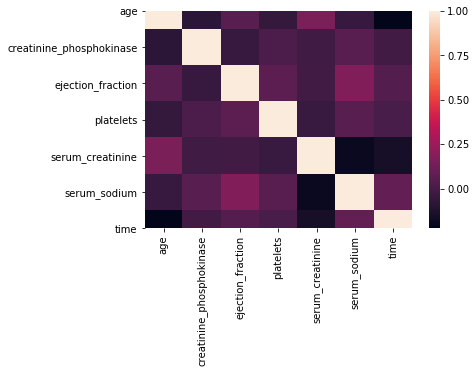

In [14]:
sns.heatmap(dados.corr())